# Reading Rainbow ASI raw image data

Below we'll retrieve Rainbow ASI data (also known at GO-Canada AGO or CGSM Rainbow), read it, and do a bit of processing. An internet connection is required since we'll need to download data.

## Retrieve a minute of data

In [1]:
import requests

In [2]:
# 2015-01-15 07:30 UTC in Fort Smith, NWT, was a particularly good night
url = "https://data.phys.ucalgary.ca/sort_by_project/GO-Canada/AGO/stream0/2015/01/15/fsmi_rainbow-11/ut07/20150115_0730_fsmi_rainbow-11_full.pgm.gz"
r = requests.get(url)

In [3]:
# save data to a local file
filename = "20150115_0730_fsmi_rainbow-11_full.pgm.gz"
with open(filename, 'wb') as f:
    f.write(r.content)

## Read the data file

In [4]:
import rainbow_imager_readfile

In [5]:
img, meta, problematic_files = rainbow_imager_readfile.read(filename)

In [6]:
# the imager takes a picture every 6 seconds, so a 1-minute file usually contains 10 images
print("Image dimensions: %d x %d" % (img.shape[0], img.shape[1]))
print("Number of images: %d" % (img.shape[2]))

Image dimensions: 256 x 512
Number of images: 10


In [7]:
# data for the first image
img[:,:,0]

array([[1118, 1110, 1124, ..., 1099, 1123, 1093],
       [1113, 1106, 1110, ..., 1110, 1107, 1130],
       [1118, 1098, 1166, ..., 1110, 1116, 1090],
       ...,
       [1083, 1076, 1064, ..., 1082, 1094, 1084],
       [1072, 1081, 1086, ..., 1090, 1070, 1052],
       [1086, 1085, 1094, ..., 1102, 1086, 1092]], dtype=uint16)

In [8]:
# metadata for first image
meta[0]

{'Imager unique ID': 'rainbow-11',
 'Site unique ID': 'fsmi',
 'Imager information revised': '2009-12-01',
 'Imager model': 'starlight Xpress SXVF-M7C',
 'Imager comment': "Brian jackel's Rainbow Camera. FSMI.",
 'Ccd type': 'Sony ICX429AKL',
 'Ccd xsize': '752 pixels',
 'Ccd ysize': '290 pixels',
 'Ccd background': '0',
 'Pixel depth': '16 bits',
 'Pixel aspect ratio': '0.5122',
 'Optical type': 'THEMIS all-sky',
 'Optical projection': 'a1=1.5,a3=0.0,b2=0.0,b4=0.0',
 'Optical center': 'x0=391,y0=150',
 'Ntp device': 'cgsm-iti',
 'Expose PGM': '/usr/local/bin/imager_expose_pgm',
 'Computer name': 'fsmi_rainbow-11 i686',
 'Operating system': 'Linux 2.6.27.5-117.fc10.i686 #1 SMP Tue Nov 18 12:19:59 EST 2008',
 'Project unique ID': 'norstar',
 'Site name': 'Fort Smith, NWT',
 'Geodetic latitude': '59.9844',
 'Geodetic Longitude': '-111.8415',
 'Geodetic altitude': '0.0',
 'Mode unique ID': 'full',
 'Mode sequence number': '581586',
 'NTP Delay': '-0.001019',
 'NTP Offset': '0.000753',
 'N

## Visualize the image

In [11]:
%matplotlib inline
from matplotlib import pyplot as plt

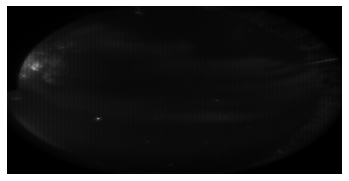

In [12]:
plt.imshow(img[:,:,0], cmap="gray")
plt.axis("off")
plt.show() 

# Let's scale the image so it's a bit brighter

In [13]:
# Pulled from SciPy. This function was depreated in 
# scipy v1.2.0, but it's quite useful for us.
import numpy as np
def bytescale(data, cmin=None, cmax=None, high=65535, low=0):
    if high > 65535:
        raise ValueError("`high` should be less than or equal to 65535.")
    if low < 0:
        raise ValueError("`low` should be greater than or equal to 0.")
    if high < low:
        raise ValueError("`high` should be greater than or equal to `low`.")

    if cmin is None:
        cmin = data.min()
    if cmax is None:
        cmax = data.max()

    cscale = cmax - cmin
    if cscale < 0:
        raise ValueError("`cmax` should be larger than `cmin`.")
    elif cscale == 0:
        cscale = 1

    scale = float(high - low) / cscale
    bytedata = (data - cmin) * scale + low
    return (bytedata.clip(low, high) + 0.5).astype(np.uint16)

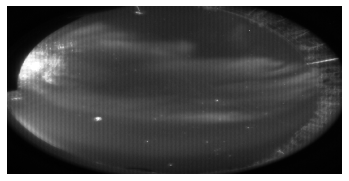

In [21]:
# scale the image with 1000 as the floor and 8000 as the ceiling, then display
im_scaled = bytescale(img[:,:,0], cmin=1000, cmax=8000)
plt.imshow(im_scaled, cmap="gray")
plt.axis("off")
plt.show() 

## Cleanup downloaded file

In [22]:
# remove the downloaded files
import os
os.remove(filename)